##### Live Feed
The code below takes input from a live video capture devices and process it in real time

In [2]:
import cv2
import face_recognition

webcam = cv2.VideoCapture(0)

while True:
    ignore, frame = webcam.read()
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    face_locations = face_recognition.face_locations(gray_frame)
    for top, right, bottom, left in face_locations:
        cv2.rectangle(frame, (right, top), (left, bottom), (255, 0, 0), 10)
    # face_image = img[top:bottom, left:right]  # crop

    cv2.imshow("HOG", frame)

    if cv2.waitKey(1) == 32: # Space Bar to close
        break
    
webcam.release()
cv2.destroyAllWindows()

##### Detect Single Image
The code detects process one image

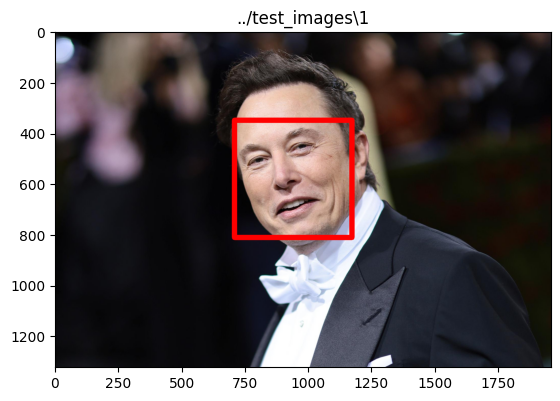

In [4]:
import cv2
import face_recognition
import os
import matplotlib.pyplot as plt

IMG_DIR = '../test_images'
img_path = '1.jpg'

fig, axs = plt.subplots()

# Load the jpg file into a numpy array
img_full_path = os.path.join(IMG_DIR, img_path)
img = face_recognition.load_image_file(img_full_path)
face_locations = face_recognition.face_locations(img)

for top, right, bottom, left in face_locations:
    img = cv2.rectangle(img, (right, top), (left, bottom), (255, 0, 0), 20)
    # face_image = img[top:bottom, left:right]  # crop

axs.imshow(img)
axs.set_title(img_full_path[:-4])

plt.show()


##### Multi Image
The code can process multi images

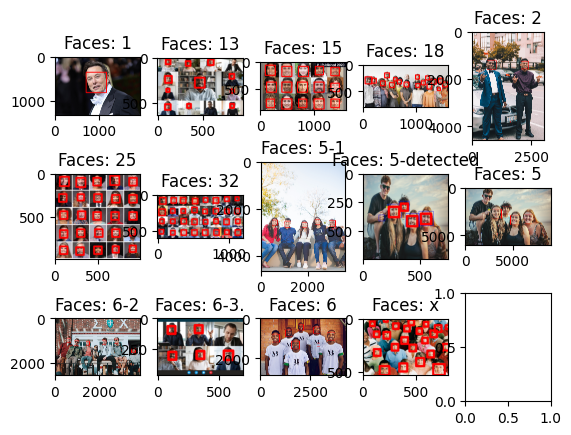

In [4]:
from math import ceil
from numpy import ravel
import cv2
import face_recognition
import os
import matplotlib.pyplot as plt

IMG_DIR = '../test_images'
img_listx = os.listdir(IMG_DIR)

img_list = []
for img in img_listx:
    if os.path.splitext(img)[1] in ['.jpg', '.jpeg', '.png']:
        img_list.append(img)
        
# img_list = [img for img in img_listx if os.path.splitext(img)[1] in ['.jpg', '.jpeg', '.png']]

fig, axs = plt.subplots(ncols=(ceil(len(img_list)/3)), nrows=3)
flat_axs = ravel(axs)

for i, img_path in enumerate(img_list):
    # Load the jpg file into a numpy array
    img_full_path = os.path.join(IMG_DIR, img_path)
    img = face_recognition.load_image_file(img_full_path)
    face_locations = face_recognition.face_locations(img)
    for top, right, bottom, left in face_locations:
        img = cv2.rectangle(img, (left, top), (right, bottom), (255, 0, 0), 20)
        # face_image = img[top:bottom, left:right]  # crop
        
    flat_axs[i].imshow(img)
    flat_axs[i].set_title("Faces: " + img_full_path[15:-4])

plt.show()